<a href="https://colab.research.google.com/github/TosinFrancis/Stream1/blob/main/Marketing_Campaingn_UnSupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
frame = pd.read_csv('/content/marketing_campaign.csv', sep = '\t')
frame.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
frame.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [ ]:
frame['total_purchase'] = frame.MntFruits + frame.MntMeatProducts +	frame.MntFishProducts +	frame.MntSweetProducts + frame.MntGoldProds + \
frame.NumDealsPurchases + frame.NumWebPurchases + frame.NumCatalogPurchases + frame.NumStorePurchases +	frame.NumWebVisitsMonth

frame.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,total_purchase
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,1014
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,27
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,375
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,56
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,273


In [ ]:
x = frame[['total_purchase', 'Income']]

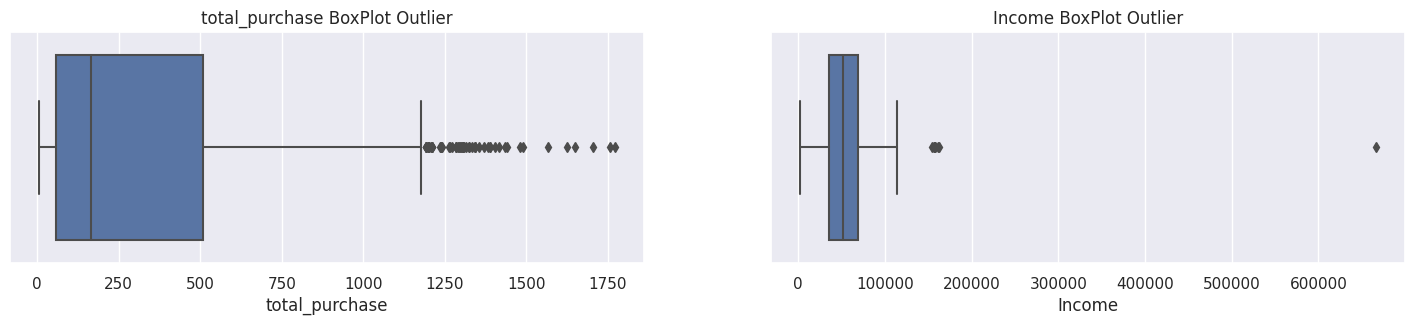

In [ ]:
def outlierChecker(dataframe, columnA, columnB):
    sns.set(style = 'darkgrid')
    plt.figure(figsize = (18,3))
    plt.subplot(1,2,1)
    sns.boxplot(x = dataframe[columnA])
    plt.title(f"{columnA} BoxPlot Outlier")

    plt.subplot(1,2,2)
    sns.boxplot(x = dataframe[columnB])
    plt.title(f"{columnB} BoxPlot Outlier")

outlierChecker(x, 'total_purchase', 'Income')


In [ ]:
def outlierRemoval(dataframe):
    for i in dataframe.columns:
        lowerQuartile = dataframe[i].describe()[4]
        upperQuartile = dataframe[i].describe()[6]
        IQR = upperQuartile - lowerQuartile
        lowerIQR = lowerQuartile- 1.5 * IQR
        upperIQR = upperQuartile + 1.5 * IQR
        dataframe = dataframe.loc[(dataframe[i] >= lowerIQR) & (dataframe[i] <= upperIQR)]
    return dataframe

x['Income'] = outlierRemoval(frame[['Income']])
x['total_purchase'] = outlierRemoval(frame[['total_purchase']])
x.dropna(inplace = True)
x.head()

,total_purchase,Income
0,1014.0,58138.0
1,27.0,46344.0
2,375.0,71613.0
3,56.0,26646.0
4,273.0,58293.0


In [ ]:
# Standardize the Features
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
for i in x.columns:
    x[[i]] = scaler.fit_transform(x[[i]])

x.head()

,total_purchase,Income
0,0.860206,0.503625
1,0.013722,0.398325
2,0.312178,0.623933
3,0.038593,0.222456
4,0.224700,0.505009


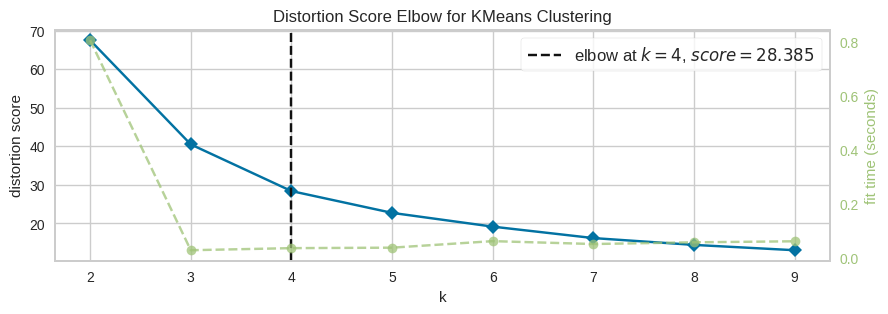

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# We Use the Elbow plot Visualizer to ascertain the best number of Clusters

#install yellowbrick to vizualize the Elbow curve
!pip install yellowbrick  --q

from sklearn.cluster import KMeans # ------------------------------------------- Instantiate the KMeans algorithm
from yellowbrick.cluster import KElbowVisualizer # ----------------------------- Instantiate the plotting library

# Instantiate the clustering model and visualizer
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10))

plt.figure(figsize = (10, 3))
visualizer.fit(x) #............................................................. Fit the data to the visualizer
visualizer.show()

In [ ]:
kmeans5 = KMeans(n_clusters = 5).fit(x) # ..................................... Fit Kmeans Algorthm on the Data Subset
X = x.values
kmeans5_label = kmeans5.labels_

print(f"KMeans algortihm labels: {kmeans5.labels_}\n\n") # ............................................. Instantiate the labels of the model
print(f"cluster centers: {kmeans5.cluster_centers_}")

KMeans algortihm labels: [3 4 2 ... 2 2 4]


cluster centers: [[0.0433944  0.22743138]
 [0.55028945 0.63770792]
 [0.29127522 0.54319255]
 [0.82549822 0.67907143]
 [0.08563538 0.42069221]]


In [ ]:
pd.Series(kmeans5_label).unique()

array([3, 4, 2, 0, 1], dtype=int32)

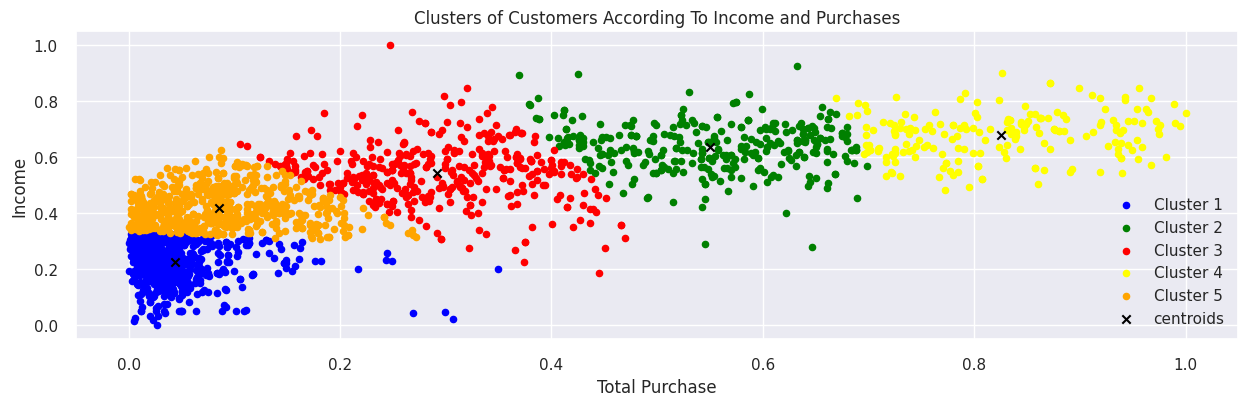

In [ ]:
# Plot the dataset using the model labelling to colour code them
plt.figure(figsize=(15, 4))
sns.set(style='darkgrid')

# plt.scatter(X = X[:, 0], y = X[:, 1], c = kmeans5_label, cmap = 'rainbow')
# plt.scatter(X = kmeans_5.cluster_centers_[:, 0], y = kmeans_5.cluster_centers_[:, 1], c = 'black', label = 'centroids')
# Scatter plots for each cluster's data points
plt.scatter(x = X[kmeans5_label == 0, 0], y = X[kmeans5_label == 0, 1], s=20, c='blue', label='Cluster 1')
plt.scatter(x = X[kmeans5_label == 1, 0], y = X[kmeans5_label == 1, 1], s=20, c='green', label='Cluster 2')
plt.scatter(x = X[kmeans5_label == 2, 0], y = X[kmeans5_label == 2, 1], s=20, c='red', label='Cluster 3')
plt.scatter(x = X[kmeans5_label == 3, 0], y = X[kmeans5_label == 3, 1], s=20, c='yellow', label='Cluster 4')
plt.scatter(x = X[kmeans5_label == 4, 0], y = X[kmeans5_label == 4, 1], s=20, c='orange', label='Cluster 5')

plt.scatter(x = kmeans5.cluster_centers_[:, 0], y = kmeans5.cluster_centers_[:, 1], c = 'black', marker = 'x', label = 'centroids')

# Adding plot labels and legend
plt.title('Clusters of Customers According To Income and Purchases')
plt.xlabel('Total Purchase')
plt.ylabel('Income')
plt.legend()
plt.show()


Cluster 1: Very Low Purchasers and Low Income

Cluster 2: Low Purchases Fairly Average Income

Cluster 3: Average Purchasers and Average Income

Cluster 4: Low Purchase and High Income

Class Green: High Purchases and High Income

In [ ]:
# Add the labels on the dataframe
cluster_labels = kmeans5.fit_predict(x)
x['K_Means'] = cluster_labels
x['K_Means'] = x.K_Means.map({1: 'LowPur and FairLow Income',
                        2: 'HighPur and HighAndLow Income',
                        3: 'MidPur and HighAndLow Income',
                        4: 'V.LowPur and V.Low',
                        5: 'MidPur and HighAndLow'})

x.head()

,total_purchase,Income,K_Means
0,0.860206,0.503625,V.LowPur and V.Low
1,0.013722,0.398325,HighPur and HighAndLow Income
2,0.312178,0.623933,MidPur and HighAndLow Income
3,0.038593,0.222456,NaN
4,0.224700,0.505009,MidPur and HighAndLow Income


In [ ]:
x.shape

(2157, 3)

In [ ]:
train = x.sample(2000)
test = x.sample(157)

test.to_csv('TestData.csv')

In [ ]:
def transformer(df):
    from sklearn.preprocessing import StandardScaler, MinMaxScaler
    scaler = StandardScaler()

    for i in df.columns:
        if df[i].dtypes == 'int' or df[i].dtypes == 'float':
            df[[i]] = scaler.fit_transform(df[[i]])


    from sklearn.preprocessing import LabelEncoder
    lb = LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'O':
            df[i] = lb.fit_transform(df[i])

transformer(train)
train.head(20)

,total_purchase,Income,K_Means
1219,-0.759031,-0.809946,4
1448,1.242046,0.935446,1
671,-0.078862,0.407291,2
392,1.550915,1.143702,1
420,-0.837891,-0.661940,4
1166,-0.765602,-0.094972,0
1005,0.190577,-0.724148,2
1816,0.295724,0.374743,2
2146,-0.890464,-1.037291,4
303,-0.276012,-0.547117,0


In [ ]:
sel_col = ['total_purchase', 'Income']
x = train[sel_col]
y = train.K_Means

In [ ]:
# split into train and test
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report, precision_recall_curve
import numpy as np

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       438
           1       1.00      1.00      1.00       240
           2       1.00      1.00      1.00       279
           3       1.00      1.00      1.00       144
           4       1.00      1.00      1.00       499

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



<Axes: >

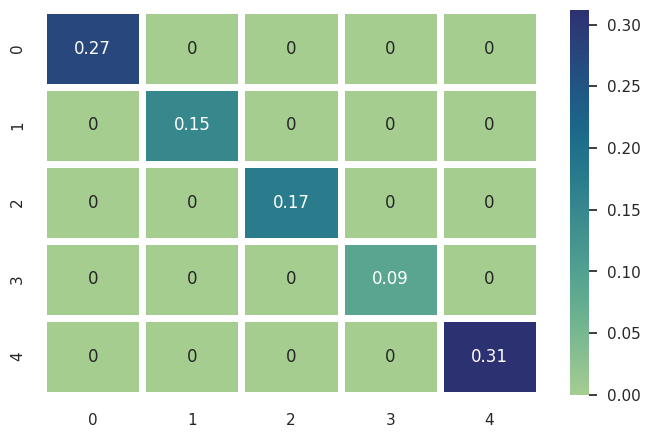

In [ ]:

tree = DecisionTreeClassifier() # ----------------------------------------------- Instantiate the algorithm

tree.fit(xtrain, ytrain) # -------------------------------------------------- Fit the algorithm on the data to create a model
train_pred = tree.predict(xtrain) # ----------------------------------------- Cros validate the model
print(classification_report(train_pred, ytrain)) # ----------------------------- View the classification metrics of the model

revealer = confusion_matrix(train_pred, ytrain)
plt.figure(figsize = (8,5))
sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot=True, cmap='crest', linewidth=5)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       100
           1       1.00      0.98      0.99        59
           2       0.98      1.00      0.99        86
           3       1.00      1.00      1.00        35
           4       1.00      0.98      0.99       120

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



<Axes: >

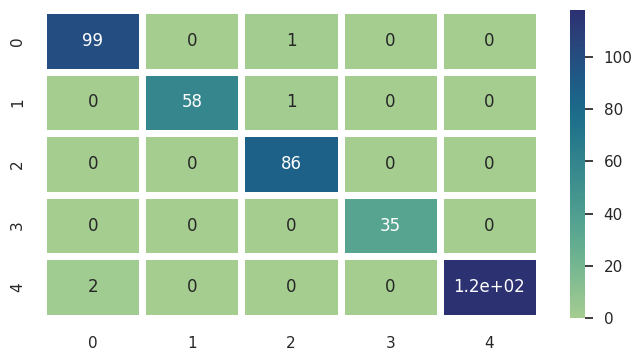

In [ ]:
# trying on test data
test_pred = tree.predict(xtest)
print(classification_report(test_pred, ytest))

revealer = confusion_matrix(test_pred, ytest)
plt.figure(figsize = (8,4))
sns.set(style = 'darkgrid')
sns.heatmap(revealer, annot=True, cmap='crest', linewidth=5)

In [ ]:
# importing the test and carrying out the same process on it.
test_data = pd.read_csv('/content/TestData.csv')
test_data.head(3)

,Unnamed: 0,total_purchase,Income,K_Means
0,157,0.006003,0.522026,HighPur and HighAndLow Income
1,818,0.121784,0.571006,HighPur and HighAndLow Income
2,1743,0.935678,0.612398,V.LowPur and V.Low


In [ ]:
transformer(test_data)

In [ ]:
test_data.drop('Unnamed: 0',  axis = 1)

,total_purchase,Income,K_Means
0,-0.920494,0.392290,0
1,-0.514225,0.666638,0
2,2.341699,0.898479,3
3,1.839129,1.389566,3
4,-0.694789,0.193455,0
...,...,...,...
152,2.164144,1.359010,3
153,-0.679742,0.507310,0
154,-0.788080,-1.566805,4
155,1.833110,1.483782,3


In [ ]:
sel_cols = ['total_purchase', 'Income']
test_data_x = test_data[sel_cols]
test_data_y = test_data['K_Means']

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        45
           1       0.91      0.91      0.91        22
           2       0.84      0.91      0.87        23
           3       0.90      1.00      0.95        18
           4       1.00      0.90      0.95        49

    accuracy                           0.92       157
   macro avg       0.91      0.93      0.92       157
weighted avg       0.92      0.92      0.92       157



<Axes: >

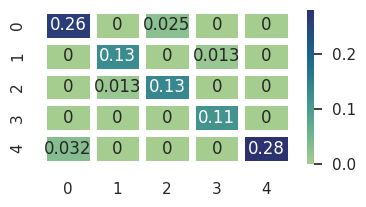

In [ ]:
new_pred = tree.predict(test_data_x)
print(classification_report(new_pred, test_data_y))

revealer = confusion_matrix(new_pred, test_data_y)
plt.figure(figsize = (4,2))
sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot=True, cmap='crest', linewidth=5)